In [1]:
#Importing the required modules
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("energy-usage-2010.csv")
df.head(10)

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0
5,Austin,1.703125e+14,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,18.0,2.0,131.00,3.00,18.0,1.0000,10.0,0.5560,18.0
6,Austin,1.703125e+14,Commercial,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,54.00,0.00,0.0,NaN,0.0,NaN,0.0
7,Austin,1.703125e+14,Commercial,Multi < 7,1470.0,1325.0,294.0,391.0,366.0,2204.0,...,64.0,63.0,2.0,131.00,1.02,59.0,0.9365,59.0,1.0000,59.0
8,Austin,1.703125e+14,Residential,Multi 7+,2461.0,4888.0,2893.0,2737.0,2350.0,3037.0,...,79.0,31.0,3.0,99.00,2.93,27.0,0.8710,27.0,1.0000,27.0
9,Austin,1.703125e+14,Residential,Multi 7+,0.0,0.0,0.0,0.0,0.0,511.0,...,84.0,33.0,3.0,99.00,3.82,22.0,0.6667,16.0,0.7270,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
COMMUNITY AREA NAME                    67051 non-null object
CENSUS BLOCK                           66974 non-null float64
BUILDING TYPE                          66974 non-null object
BUILDING_SUBTYPE                       66974 non-null object
KWH JANUARY 2010                       66180 non-null float64
KWH FEBRUARY 2010                      66180 non-null float64
KWH MARCH 2010                         66180 non-null float64
KWH APRIL 2010                         66180 non-null float64
KWH MAY 2010                           66180 non-null float64
KWH JUNE 2010                          66180 non-null float64
KWH JULY 2010                          66180 non-null float64
KWH AUGUST 2010                        66180 non-null float64
KWH SEPTEMBER 2010                     66180 non-null float64
KWH OCTOBER 2010                       66180 non-null float64
KWH NOVEMBER 2010         

In [4]:
#Counting the number of occurrence of each Area
df['COMMUNITY AREA NAME'].value_counts()

West Town          2869
Austin             2528
Logan Square       2343
Lakeview           2066
Belmont Cragin     1812
                   ... 
O'Hare              124
Near South Side     120
Burnside            116
Oakland             108
Riverdale            61
Name: COMMUNITY AREA NAME, Length: 77, dtype: int64

In [5]:
#Total enrgy consumption of each  Area
sdf=df.groupby(['COMMUNITY AREA NAME']).sum()
sdf.head(10)

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
COMMUNITY AREA NAME,,,,,,,,,,,,,,,,,,,,,
Albany Park,1.963691e+17,8099814.0,8318671.0,8167825.0,8152326.0,10537220.0,14172588.0,14798474.0,12115646.0,9139269.0,...,145619.0,52066.0,2092.07,82331.91,4168.27,46871.0,1032.6859,30115.0,646.9883,46871.0
Archer Heights,6.710438e+16,8999177.0,8700446.0,8275265.0,8519853.0,9163139.0,10777922.0,11499250.0,11148907.0,9248428.0,...,29591.0,9651.0,594.88,24096.87,1489.08,8773.0,333.7608,3835.0,155.5279,8773.0
Armour Square,4.785876e+16,5528116.0,5463905.0,4914495.0,4942071.0,5119589.0,5615089.0,7439015.0,7065485.0,5698898.0,...,35884.0,14838.0,532.08,16630.31,888.04,13660.0,236.7815,9015.0,157.3031,13660.0
Ashburn,1.476648e+17,10784936.0,10657440.0,10168703.0,10448903.0,13935993.0,18845801.0,20510478.0,16050164.0,11894014.0,...,63033.0,21257.0,1173.39,43240.34,3335.43,20033.0,800.1712,3508.0,128.9627,20033.0
Auburn Gresham,2.427019e+17,9494108.0,9534584.0,9208973.0,8950586.0,10746825.0,14160557.0,15024383.0,12789634.0,9844096.0,...,111768.0,48218.0,2227.19,99460.46,5067.91,41229.0,1186.7274,24217.0,668.9451,41229.0
Austin,4.303806e+17,21506684.0,24292930.0,23662582.0,21966745.0,26016007.0,30798364.0,35240528.0,35215333.0,28395692.0,...,248791.0,98060.0,4490.96,197151.64,9624.24,83773.0,2112.5868,53718.0,1346.1674,83773.0
Avalon Park,5.722643e+16,2742619.0,2629352.0,2413518.0,2434028.0,2782662.0,3688298.0,3991451.0,3506747.0,2637194.0,...,20093.0,8608.0,487.36,23101.54,1042.95,7767.0,292.4163,2575.0,97.8921,7767.0
Avondale,1.680991e+17,9733228.0,9669355.0,9560428.0,8974441.0,10868366.0,14248133.0,15438828.0,13225706.0,10544025.0,...,100963.0,40100.0,1754.60,81058.63,3170.56,35444.0,835.8067,22202.0,582.8485,35444.0
Belmont Cragin,3.084355e+17,15661282.0,16844580.0,15791461.0,15443287.0,18480112.0,23403306.0,25867306.0,24148650.0,18072171.0,...,184432.0,56038.0,2839.92,125358.71,7847.84,51040.0,1602.9311,27629.0,911.7249,51040.0


In [6]:
#Area which comsumes more THERMS energy
sdf.nlargest(10, 'TOTAL THERMS')
lig=sdf.nlargest(10, 'TOTAL THERMS').index
print(lig)
dfl=df[df['COMMUNITY AREA NAME'].isin(lig)]

Index(['Near West Side', 'Near North Side', 'Loop', 'Lakeview', 'Austin',
       'West Town', 'Portage Park', 'Lincoln Park', 'Rogers Park',
       'South Lawndale'],
      dtype='object', name='COMMUNITY AREA NAME')


In [7]:
#Area which comsumes more energy
sdf.nlargest(10, 'TOTAL KWH')
lig=sdf.nlargest(10, 'TOTAL KWH').index
print(lig)
dfl=df[df['COMMUNITY AREA NAME'].isin(lig)]

Index(['Loop', 'Near North Side', 'Near West Side', 'Near South Side',
       'Woodlawn', 'Lakeview', 'Lincoln Park', 'West Town', 'Austin',
       'South Lawndale'],
      dtype='object', name='COMMUNITY AREA NAME')


Here  we see that 8  Areas are common to both the result for maximum consumtipon

In [8]:
#Area which comsumes less THERMS energy
sdf.nsmallest(10, 'TOTAL THERMS').iloc[:10]
lis=sdf.nsmallest(10, 'TOTAL THERMS').index
print(lis)
dfs=df[df['COMMUNITY AREA NAME'].isin(lis)]

Index(['Fuller Park', 'Burnside', 'Oakland', 'Hegewisch', 'Washington Park',
       'Riverdale', 'O'Hare', 'Montclare', 'Armour Square', 'Edison Park'],
      dtype='object', name='COMMUNITY AREA NAME')


In [9]:
#Area which comsumes less energy
sdf.nsmallest(10, 'TOTAL KWH').iloc[:10]
lis=sdf.nsmallest(10, 'TOTAL KWH').index
print(lis)
dfs=df[df['COMMUNITY AREA NAME'].isin(lis)]

Index(['Oakland', 'Fuller Park', 'Burnside', 'Washington Park', 'Hegewisch',
       'Avalon Park', 'Edison Park', 'Montclare', 'West Garfield Park',
       'East Side'],
      dtype='object', name='COMMUNITY AREA NAME')


Here also we see that 7 out of 10  Areas are common thus we'll focus only analysis of one consumption 

Text(0.5, 1.0, 'Area which consume more power')

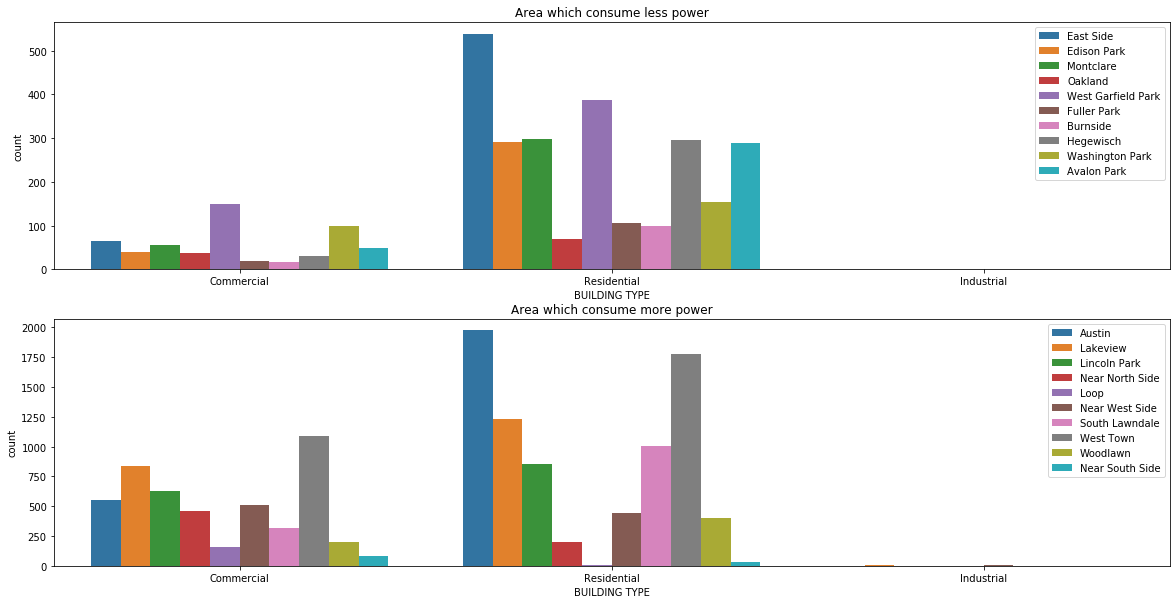

In [10]:
fig, axs = plt.subplots(nrows=2,figsize=(20,10))
sns.countplot(x='BUILDING TYPE',data=dfs,hue='COMMUNITY AREA NAME', ax=axs[0])
axs[0].legend(loc='upper right')
axs[0].set_title("Area which consume less power")

sns.countplot(x='BUILDING TYPE',data=dfl,hue='COMMUNITY AREA NAME', ax=axs[1])
axs[1].legend(loc='upper right')
axs[1].set_title("Area which consume more power")

From the above graphs we see that the Area which consume more power is mainly due to the reason that they have more number of plots than the area which consume less power.

It is not the population comparison

Text(0.5, 1.0, 'Area which consume more power')

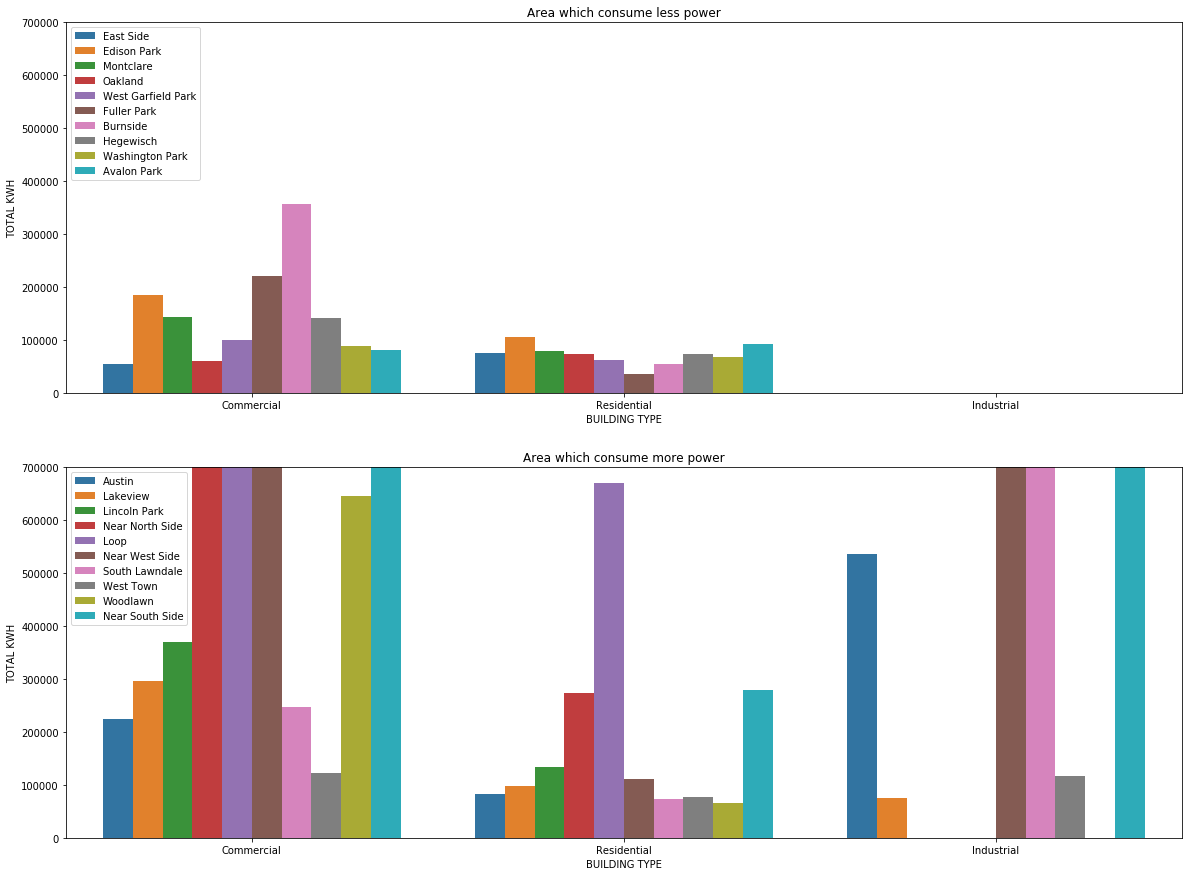

In [11]:
fig, axs = plt.subplots(nrows=2,figsize=(20,15))
sns.barplot(x=dfs['BUILDING TYPE'],y=dfs['TOTAL KWH'],hue=dfs['COMMUNITY AREA NAME'], ax=axs[0], ci=None)
sns.barplot(x='BUILDING TYPE',y='TOTAL KWH',data=dfl,hue='COMMUNITY AREA NAME', ax=axs[1], ci=None)

axs[0].legend(loc='upper right')
axs[0].set_ylim(0,700000)
axs[0].set_title("Area which consume less power")
axs[0].legend(loc=0)

axs[1].legend(loc=0)
axs[1].set_ylim(0,700000)
axs[1].set_title("Area which consume more power")

From the above graph it seems that though the count for **Residential** category is more as seens above but the more consumtion is been done by **Commercial** plots for both type of Area 

Text(0.5, 1.0, 'Area which consume more power')

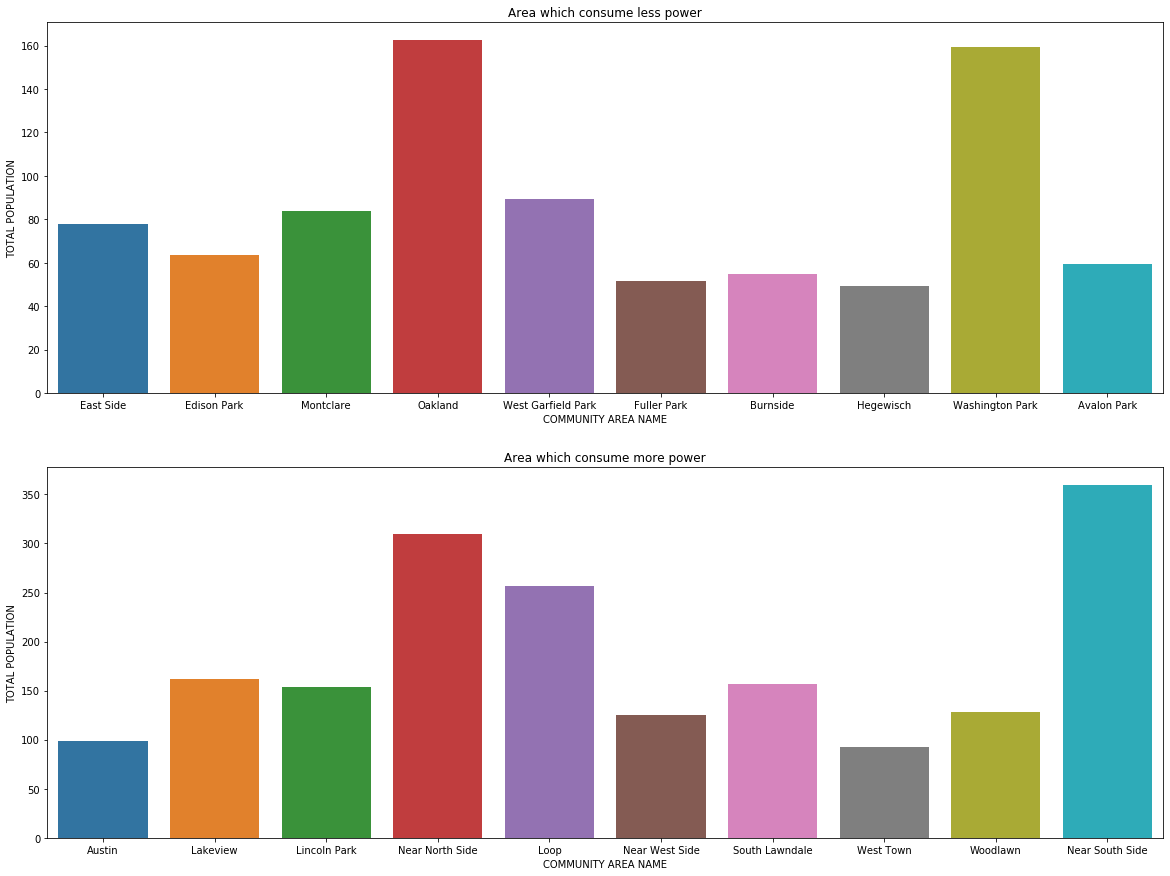

In [12]:
fig, axs = plt.subplots(nrows=2,figsize=(20,15))
sns.barplot(x='COMMUNITY AREA NAME',y='TOTAL POPULATION',data=dfs, ax=axs[0], ci=None)
sns.barplot(x='COMMUNITY AREA NAME',y='TOTAL POPULATION',data=dfl, ax=axs[1], ci=None)


axs[0].set_title("Area which consume less power")

axs[1].set_title("Area which consume more power")

Population play an important role in the region which consume more power apart from these region being more of commercial space as seen above

In [13]:
#Getting energy consumption for each month
dft=pd.concat([dfs,dfl])
dft=dft.groupby(['COMMUNITY AREA NAME']).sum()
dft=dft.iloc[:,1:13]
dft

,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010
COMMUNITY AREA NAME,,,,,,,,,,,,
Austin,21506684.0,24292930.0,23662582.0,21966745.0,26016007.0,30798364.0,35240528.0,35215333.0,28395692.0,24912923.0,30410118.0,36644917.0
Avalon Park,2742619.0,2629352.0,2413518.0,2434028.0,2782662.0,3688298.0,3991451.0,3506747.0,2637194.0,2679234.0,3868365.0,4367912.0
Burnside,1120345.0,1110407.0,1102426.0,1089560.0,1287721.0,1495791.0,1567598.0,1292817.0,1109799.0,1142035.0,1444386.0,1564108.0
East Side,3635448.0,3701266.0,3350270.0,3476031.0,4738304.0,6510207.0,6768643.0,5079652.0,3807306.0,3949137.0,5460683.0,5338953.0
Edison Park,2461976.0,2619240.0,2610050.0,2902832.0,3890866.0,5411282.0,5684115.0,3975806.0,2772883.0,3068880.0,3778499.0,3987141.0
Fuller Park,1128288.0,1132120.0,1098838.0,1076348.0,1237369.0,1305163.0,1516609.0,1475511.0,1222902.0,1171600.0,1329071.0,1510706.0
Hegewisch,1565474.0,1741986.0,1664753.0,1907687.0,2215826.0,2943318.0,3740674.0,3375732.0,2427933.0,2064173.0,2378460.0,2726024.0
Lakeview,28973867.0,28080784.0,27041453.0,27146909.0,35238262.0,48053388.0,50988194.0,43701704.0,32736483.0,30807295.0,37528357.0,43957540.0
Lincoln Park,28662486.0,27244024.0,25282095.0,25102611.0,31425713.0,39478559.0,42920332.0,41420785.0,31834193.0,28368218.0,33736525.0,40731118.0


<Figure size 1440x432 with 0 Axes>

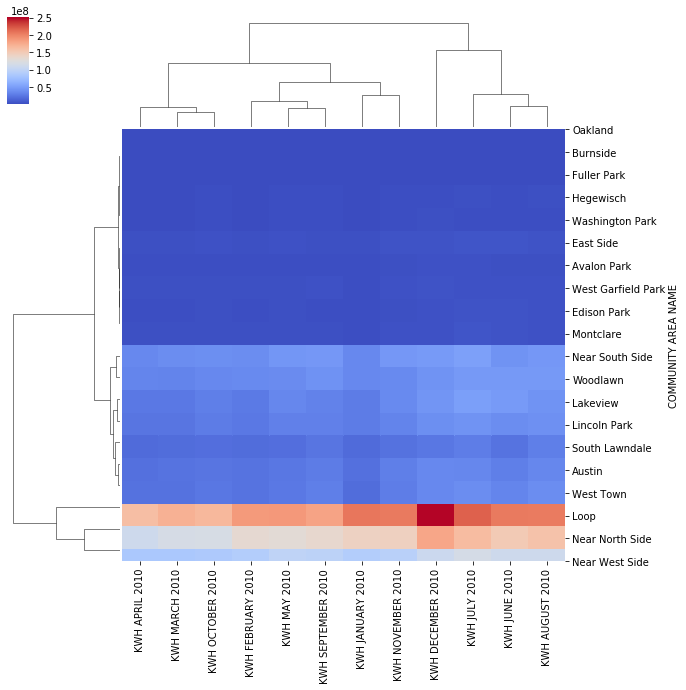

In [14]:
plt.figure(figsize=(20,6))
sns.clustermap(dft,cmap='coolwarm')